PHYS 105: Computational Physics I
In-Class Exercise 9.0 (a)
Suborbital Motion: Curvature
Let's continue to increase the realism of our simulations. Start with the week 9 demo code (no air resistance), and consider again a projectile.
Lets include the curvature of Earth's surface in determining the end of the trajectory. From here on, it will be convenient to take Earth's center as the origin---apart from the initial value of  𝑦
y
 , the integrator is unchanged.
Our initial position thus is  𝑥=0, 𝑦=𝑅
x
=
0
,
 
y
=
R
 , where  𝑅=6,400
R
=
6
,
400
  km =  6.4×106
6.4
×
10
6
  m is Earth's radius. We will terminate our calculation when  𝑟=𝑥2+𝑦2‾‾‾‾‾‾‾√
r
=
x
2
+
y
2
  becomes less than  𝑅
R
 , and interpolate all quantities to  𝑟=𝑅
r
=
R
 .
Instructions:
Take gravity to be uniform,  𝑎𝑥
a
x
  = 0,  𝑎𝑦=−𝑔=−9.80
a
y
=
−
g
=
−
9.80
  m/s 2
2
 , and use a timestep of  𝛿𝑡=0.1
δ
t
=
0.1
  s. For  𝑣0
v
0
  = 1500 m/s and angle 𝜃0=20∘
θ
0
=
20
∘
  to the horizontal,
Plot the trajectory of your projectile until it strikes the ground, at  𝑟
r
  <  𝑅
R
 .
Determine the range (now measured along the surface), maximum height (now measured in the radial direction), and time of flight. As usual, use linear interpolation (to  𝑟
r
  =  𝑅
R
 ) to refine your answer for the range and time of flight.
Determine by how much does the range, height, and time of flight change from the case of no curvature.

## This Lower one is wrong because the acceleration does not follow gravity correctly

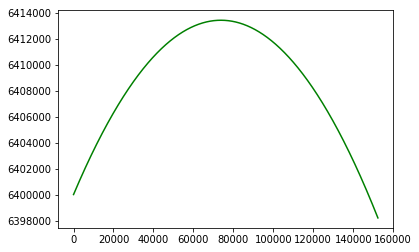

0.0 0.0 1500.0 20.0
Time of flight: 108.12564044302673s
Range of flight: 152421.70811011962m
Maximum: 13866.895245159976m


In [18]:
import sys
from math import *
import matplotlib.pyplot as plt

# Gravity, constant acceleration
g     = 9.8

# Default options:
alpha = 0.0
beta  = 0.0
theta = 20.0				# (degrees)
v0    = 1500.0				# unit: m/s 
R = 6400000

def acc(x, y, vx, vy, t):

    ax = 0.0

    # if (alpha > 0.0): ax += ...
    # if (beta > 0.0): ax += ...
    
    ay = -g

    # if (alpha > 0.0): ay += ...
    # if (beta > 0.0): ay += ...
    
    return ax,ay


def take_a_step(x, y, vx, vy, t, dt):

    ax,ay = acc(x, y, vx, vy, t)

    # Predict: 

    x += vx*dt + 0.5*ax*dt*dt
    y += vy*dt + 0.5*ay*dt*dt
    vx += ax*dt
    vy += ay*dt
    t += dt

    # Correct: 

    ax1,ay1 = acc(x, y, vx, vy, t)

    vx += 0.5*(ax1-ax)*dt
    vy += 0.5*(ay1-ay)*dt

    return x,y,vx,vy,t


def interp(x0, y0, x1, y1, x):
    return y0 + (y1 - y0) * (x - x0) / (x1 - x0)



# Set parameters governing the numerical details 
dt = 0.1

# Set initial position and velocity 
x0 = 0.0
y0 = R

# Determine components of the initial velocity vector 
vx0 = v0 * cos(theta * pi/180.0)
vy0 = v0 * sin(theta * pi/180.0)

# Initialize the trajectory 
t = 0
x = x0
y = y0
r = sqrt(x**2 + y**2)
vx = vx0
vy = vy0

#print x, y, t
rmax = 0.0
x_list = []
y_list = []
t_list = []

while r >= R:
    
    x_list.append(x)
    y_list.append(y)
    t_list.append(t)
    
    rprev = sqrt(x**2 + y**2)
    tprev = t
    xprev = x
    yprev = y

    (x,y,vx,vy,t) = take_a_step(x, y, vx, vy, t, dt)
    
    r = sqrt(x**2 + y**2)
    
    #print x, y, t
    if r > rmax: rmax = r

rmax -= R
tof   = interp(rprev, tprev, r, t,  R)

x_range = interp(rprev, xprev, r, x,  R)
y_range = interp(rprev, yprev, r, y,  R)

the_range = atan(x_range/y_range) * R


plt.plot(x_list, y_list, 'g-')
plt.show()

print(alpha, beta, v0, theta)
print('Time of flight: {}s\nRange of flight: {}m\nMaximum: {}m'.format(tof, the_range, rmax ))

### Modifying Top One to make it more true to Nature

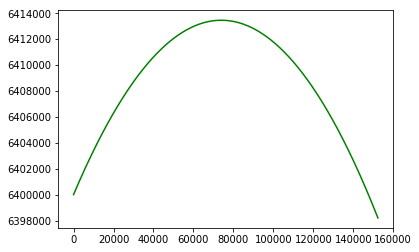

0.0 0.0 1500.0 20.0
Time of flight: 108.43320268682815s
Range of flight: 152399.38688862484m
Maximum: 13897.487943877466m


In [19]:
import sys
from math import *
import matplotlib.pyplot as plt

# Gravity, constant acceleration
g     = 9.8

# Default options:
alpha = 0.0
beta  = 0.0
theta = 20.0				# (degrees)
v0    = 1500.0				# unit: m/s 
R = 6400000
GM = g * R**2

def acc(x, y, vx, vy, t):
    r_temp = sqrt(x**2 + y**2)
    
    ax = -GM * x / r_temp**3
    ay = -GM * y / r_temp**3
    
    return ax,ay


def take_a_step(x, y, vx, vy, t, dt):

    ax,ay = acc(x, y, vx, vy, t)

    # Predict: 

    x += vx*dt + 0.5*ax*dt*dt
    y += vy*dt + 0.5*ay*dt*dt
    vx += ax*dt
    vy += ay*dt
    t += dt

    # Correct: 

    ax1,ay1 = acc(x, y, vx, vy, t)

    vx += 0.5*(ax1-ax)*dt
    vy += 0.5*(ay1-ay)*dt

    return x,y,vx,vy,t


def interp(x0, y0, x1, y1, x):
    return y0 + (y1 - y0) * (x - x0) / (x1 - x0)



# Set parameters governing the numerical details 
dt = 0.1

# Set initial position and velocity 
x0 = 0.0
y0 = R

# Determine components of the initial velocity vector 
vx0 = v0 * cos(theta * pi/180.0)
vy0 = v0 * sin(theta * pi/180.0)

# Initialize the trajectory 
t = 0
x = x0
y = y0
r = sqrt(x**2 + y**2)
vx = vx0
vy = vy0

#print x, y, t
rmax = 0.0
x_list = []
y_list = []
t_list = []

while r >= R:
    
    x_list.append(x)
    y_list.append(y)
    t_list.append(t)
    
    rprev = sqrt(x**2 + y**2)
    tprev = t
    xprev = x
    yprev = y

    (x,y,vx,vy,t) = take_a_step(x, y, vx, vy, t, dt)
    
    r = sqrt(x**2 + y**2)
    
    #print x, y, t
    if r > rmax: rmax = r

rmax -= R
tof   = interp(rprev, tprev, r, t,  R)

x_range = interp(rprev, xprev, r, x,  R)
y_range = interp(rprev, yprev, r, y,  R)

the_range = atan(x_range/y_range) * R


plt.plot(x_list, y_list, 'g-')
plt.show()

print(alpha, beta, v0, theta)
print('Time of flight: {}s\nRange of flight: {}m\nMaximum: {}m'.format(tof, the_range, rmax ))